# <center>Sentiment Analysis on Harvard University Reviews</center>

** **
## <center>*01 - Exploratory Data Analysis Notebook*</center>

This project was developed with the aim of analysing and undestanding the sentiment transmited by Reviews of the Harvard University. This is a topic within Education, whose conclusions could lead to better decision making in what to improve in order to make Harvard University even better.

This dataset was collected from Kaggle, and is available in [Harvard University Ratings and Reviews](https://www.kaggle.com/datasets/kanchana1990/harvard-university-ratings-and-reviews).

This dataset is composed by 7 different columns, as follows:

- *published_date* - timestamp of when the review was posted;
- *published_platform* - indicates which platform was used to make the review;
- *rating* - numerical rating (1-5) given by the reviewer;
- *type* - type of submission;
- *helpful_votes* - number of times a review was marked as helpful;
- *title* - headline of the review;
- *text* - review.

This project will be divided into 2 notebooks and 2 external *py* files. 

The first notebook consists of Exploratory Data Analysis, where the data is explored and cleaned. For this notebook, an external file was used, *functions2*, which includes functions used throughout the notebook.

The second notebook consists of Sentiment Analysis using Lexicon-based algorithms, such as *Vader*, *TextBlob*, *SentiWordNet*, *AFINN*. After the implementation of said algorithms, the results will be evaluated and conclusions will be taken. For the development of this notebook the file *functions_SA* was used.

** **

This project was developed by <br><br>

*<center>António Oliveira - 2023039 - Industrial Applications of AI*

** **

# Table of Contents

1. [Importing Data & Libraries](#1.-Importing-Data-&-Libraries)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Importing-Data)
    
    1.3 [Initial Exploration](#1.3-Initial-Exploration) <br><br>
    
2. [Exploratory Data Analysis](#2.Exploratory-Data-Analysis)

    2.1 [Missing Values](#2.1-Missing-Values)
    
    2.2 [Duplicates](#2.2-Duplicates)
    
    2.3 [Feature Engineering](#2.3-Feature-Engineering)
    
    2.4 [Outliers](#2.4-Outliers) <br><br>
    
3. [Text Preprocessing](#3.-Text-Preprocessing)    <br><br>

4. [Visualisations](#4.-Visualisations) <br><br>
    
5. [Export](#5.-Export) <br><br>

6. [AI Statement](#6.-AI-Statement)

** **

## 1. Importing Data & Libraries

### 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Defining a Colour Palette
palette = sns.color_palette("dark:salmon_r")

# wordclouds
from wordcloud import WordCloud


# external py file
import functions2

# Warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Checking the functions in the external file

In [2]:
functions = [func for func in dir(functions2) if callable(getattr(functions2, func))]

# Print the list of functions
print("Functions in the external module:\n")
for func in functions:
    print(func+ '\n')

Functions in the external module:

PorterStemmer

WordNetLemmatizer

detect

detect_language

detect_outliers_per_column

plot_boxplots

preprocessor

sent_tokenize

stopword_remover

translate_with_deepl

word_tokenize



### 1.2 Data

In [3]:
data = pd.read_csv('/Users/antoniooliveira/Projects/Industrial Applications of AI/Assignment 4/harvard_reviews.csv')
data.head(3)

,published_date,published_platform,rating,type,helpful_votes,title,text
0,2023-12-28T08:02:14-05:00,Mobile,5,review,0,Best classes and good environment,Good thanks for everything good work group 👍 h...
1,2023-12-12T00:38:26-05:00,Desktop,4,review,0,Harvard University,Harvard University was founded in 1636 and is ...
2,2023-12-10T08:21:35-05:00,Mobile,3,review,0,Walk around campus,We did a walk around most of the Harvard Campu...


### 1.3 Initial Exploration

**Describe & Info**

In [4]:
data.describe()

,rating,helpful_votes
count,3184.000000,3184.000000
mean,4.456658,0.498744
std,0.744024,2.819638
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,111.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      3184 non-null   object
 1   published_platform  3184 non-null   object
 2   rating              3184 non-null   int64 
 3   type                3184 non-null   object
 4   helpful_votes       3184 non-null   int64 
 5   title               3184 non-null   object
 6   text                3184 non-null   object
dtypes: int64(2), object(5)
memory usage: 174.2+ KB


**Unique Values**

In [6]:
data.nunique()

published_date        3184
published_platform       2
rating                   5
type                     1
helpful_votes           15
title                 2891
text                  3184
dtype: int64

In [7]:
list_ = ['published_platform', 'rating', 'type', 'helpful_votes']

for value in list_:
    unique_values = data[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")



Unique values in column 'published_platform': 
 ['Mobile' 'Desktop'] 


Unique values in column 'rating': 
 [5 4 3 1 2] 


Unique values in column 'type': 
 ['review'] 


Unique values in column 'helpful_votes': 
 [  0   2   1   3  91   4  19  48   5   7   8   6 111  14  10] 




Since the variable *type* is always the same, it will be dropped.

In [8]:
data = data.drop('type', axis = 1)

## 2 Exploratory Data Analysis

### 2.1 Missing Values

In [9]:
data.isnull().sum()

published_date        0
published_platform    0
rating                0
helpful_votes         0
title                 0
text                  0
dtype: int64

As it can be observed, there are no missing values in this dataset.

### 2.2 Duplicates

In [10]:
data[data.duplicated()]

,published_date,published_platform,rating,helpful_votes,title,text


After checking for duplicate values, none were found.

### 2.3 Feature Engineering

**Published Date**

In order to gain insights from *published_date*, its type needs to be changed to *datetime*. The timezone of each observation will also be standardised.

In [11]:
# Transforming published_date to datetime and setting all observations to the same timezone
data['published_date'] = pd.to_datetime(data['published_date'], utc=True)
data['published_date']

0      2023-12-28 13:02:14+00:00
1      2023-12-12 05:38:26+00:00
2      2023-12-10 13:21:35+00:00
3      2023-11-08 02:20:21+00:00
4      2023-10-02 21:40:42+00:00
                  ...           
3179   2010-10-29 09:47:57+00:00
3180   2010-08-23 10:08:51+00:00
3181   2010-08-23 04:06:41+00:00
3182   2010-06-03 11:37:36+00:00
3183   2009-09-27 20:39:18+00:00
Name: published_date, Length: 3184, dtype: datetime64[ns, UTC]

Extracting information from the converted variable *published_date*

In [12]:
data['Hour'] = data['published_date'].dt.dayofweek 
data['Day'] = data['published_date'].dt.day
data['Month'] = data['published_date'].dt.month
data['Year'] = data['published_date'].dt.year
data['Timezone'] = data['published_date'].dt.tz

### 2.4 Outliers

Looking for outliers by means of Boxplots.

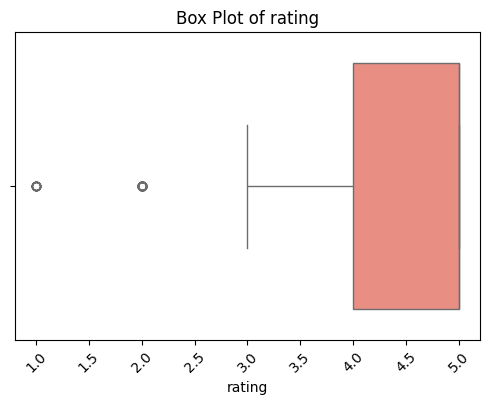

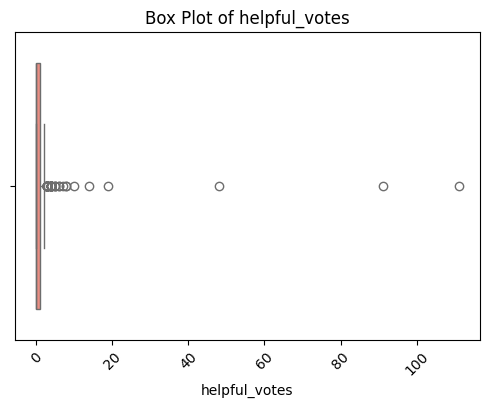

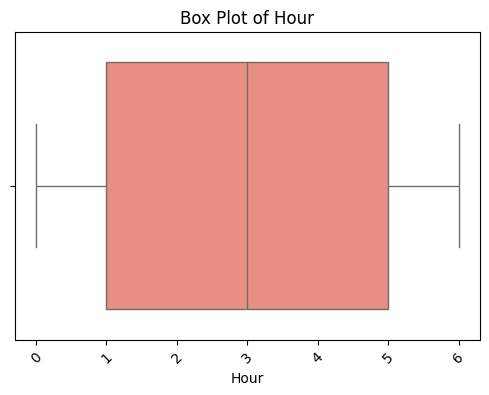

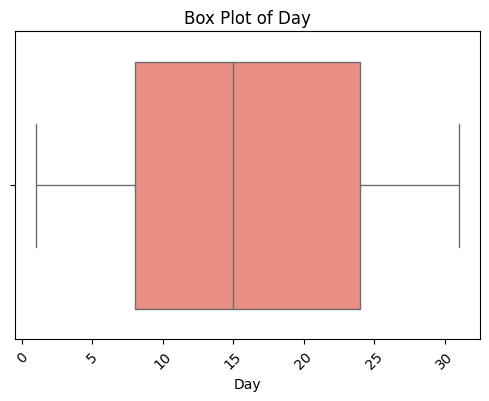

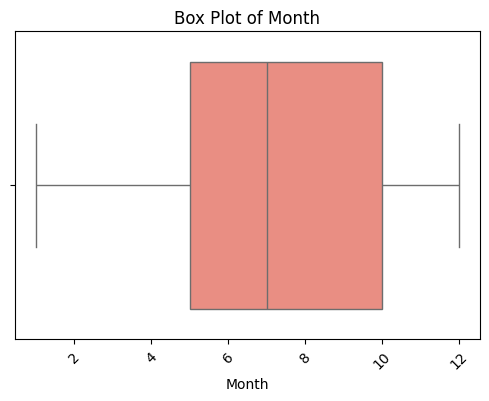

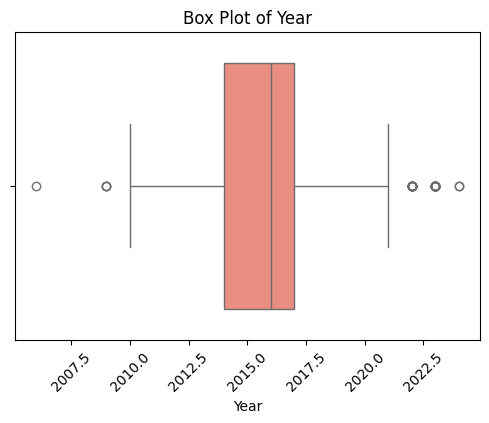

In [13]:
# Get a list of all numeric column names
columns_to_check = data.select_dtypes(include=['int', 'float']).columns.to_list()
        
functions2.plot_boxplots(data, columns_to_check, palette=palette)

Taking a closer look at the variables that show Outliers by using Statistical methods.

In [14]:
columns_to_check = ['rating', 'helpful_votes', 'Year']
outlier_info = functions2.detect_outliers_per_column(data, columns_to_check)

# Print information for each column
for column, info in outlier_info.items():
    print(f"Column: {column}")
    print(f"Lower Bound: {info['lower_bound']}")
    print(f"Upper Bound: {info['upper_bound']}")
    print(f"Number of outliers: {info['outlier_count']}")
    print("--------------------")


Column: rating
Lower Bound: 2.5
Upper Bound: 6.5
Number of outliers: 60
--------------------
Column: helpful_votes
Lower Bound: -1.5
Upper Bound: 2.5
Number of outliers: 87
--------------------
Column: Year
Lower Bound: 2009.5
Upper Bound: 2021.5
Number of outliers: 50
--------------------


Taking a closer look at each individual variable taking into account the upper and lower bounds previously computed.

In [15]:
data[(data['rating'] < 2.5) | (data['rating'] > 5)]

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone
31,2022-03-19 17:24:53+00:00,Desktop,1,0,Don't waste your time looking for the pretty p...,"It's dirty cheap and not good looking, just pl...",5,19,3,2022,UTC
42,2021-08-17 07:21:52+00:00,Mobile,2,0,Open … but closed,"As an alumnus here, I found it particularly of...",1,17,8,2021,UTC
60,2020-01-02 10:51:16+00:00,Mobile,2,0,Underwhelmed,You would think a college of such caliber woul...,3,2,1,2020,UTC
228,2018-10-13 20:06:23+00:00,Mobile,2,0,Harvard tour,The tour was deceaving as we do not get to vis...,5,13,10,2018,UTC
298,2018-07-07 17:20:45+00:00,Mobile,2,0,Nice architecture and venerable history...,... that is out of touch with not only the res...,5,7,7,2018,UTC
309,2018-06-15 11:59:56+00:00,Desktop,1,3,Meh,Though it is to be respected for the education...,4,15,6,2018,UTC
324,2018-05-25 22:46:16+00:00,Mobile,1,1,Not impressive at all!!!,This campus is not special at all. Most campus...,4,25,5,2018,UTC
368,2018-01-05 13:44:12+00:00,Desktop,2,2,Boring Boring Boring,Lets just get one thing straight from the star...,4,5,1,2018,UTC
449,2017-09-08 06:16:35+00:00,Desktop,2,0,just disappointed,"setting is neither urban not rural; crowded, a...",4,8,9,2017,UTC
483,2017-08-08 20:54:53+00:00,Desktop,2,2,Tourists Point of View,Harvard was a target visit in our ten day vaca...,1,8,8,2017,UTC


As the *rating* variable has values that range from 1 to 5, the detected outliers look like low ratings, which even if not common, are important. Consequently, they will not be removed.

In [16]:
data[(data['helpful_votes'] < 0) ]#| (data['helpful_votes'] > 2.5)]

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone


Since there are no negative values for *helpful_votes*, the detected outliers just show high values, which again are not common, but still important. Therefore they will not be removed

In [17]:
data[(data['Year'] < 2010) | (data['Year'] > 2024)]

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone
1914,2009-07-14 14:33:17+00:00,Desktop,5,4,Tour of Harvard University - A must!,"On our recent vacation to Boston, we wanted to...",1,14,7,2009,UTC
1915,2009-02-11 01:05:18+00:00,Desktop,4,3,The Most Student Friendly City,A stay in Boston is incomplete without a visit...,2,11,2,2009,UTC
1916,2006-04-30 00:00:00+00:00,Desktop,5,3,Wandering the Unviersity Campus,Wandering around the Cambridge campus of Harva...,6,30,4,2006,UTC
3183,2009-09-27 20:39:18+00:00,Desktop,5,1,一度は行くべき,とても歴史のある素敵な建物です。ハーバードスクエアーの駅の近くから無料のツアー（英語）をハー...,6,27,9,2009,UTC


Since all reviews were made before 2024 the detected outliers will not be removed

## 3. Text Preprocessing

Having noticed that there are non-English Reviews, the language in each review will now be detected through the usage of the *langdetect* library.

**Language Detection**

In [18]:
data['language'] = data['text'].apply(functions2.detect_language)

Listing the Unique Values of Language.

In [19]:
list_ = ['language']
for value in list_:
    unique_values = data[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")

Unique values in column 'language': 
 ['en' 'de' 'pt' 'es' 'ja' 'fr' 'it' 'pl' 'tr' 'el' 'ru' 'nl' 'sv' 'ko'
 'no' 'id' 'zh-cn' 'hu' 'ar' 'he' 'da' 'zh-tw' 'th' 'sk'] 




Displaying the Number of Observations per Language.

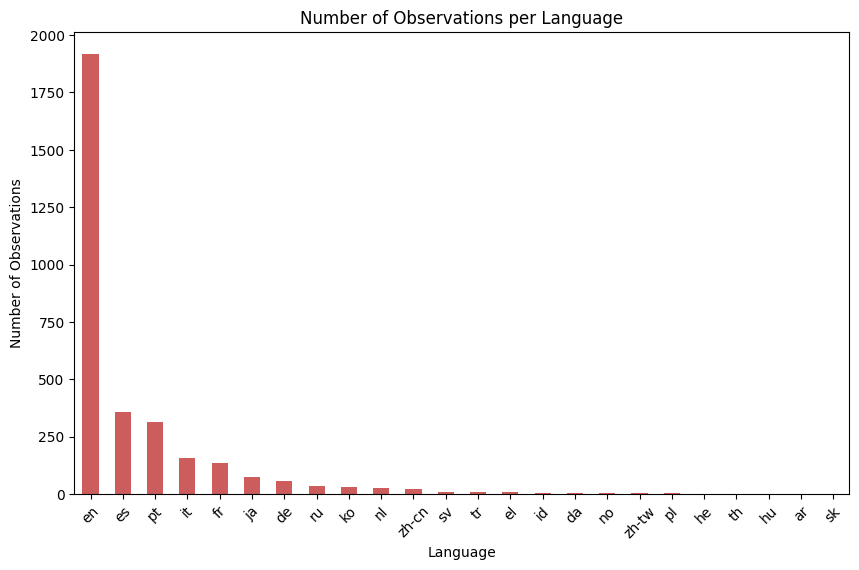

In [20]:
# Count observations by language
language_counts = data['language'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='indianred')
plt.title('Number of Observations per Language')
plt.xlabel('Language')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

Even though most observations are in English (~60%), it is worth it to try to translate the remaining observations, since they still constitute a significant part of the dataset.

To do so, I explored several options, such as *libretranslatepy*, *translate* libraries and APIs of Google and DeepL.

Since the libraries were not working, possibily because of the amount of text in each observation, I decided to experiment with the DeepL API, as follows.

The DeepL API has a free tier which allows to translate 500k characters per month. As so, the number of characters existent in the dataset will be computed, to ensure they are within this limit.

In [21]:
# characters per observations
data['char_count'] = data['text'].str.len()

# total characters
data['char_count'].sum()

969564

Since the total character counts exceeds the limit, one must check the sum of characters from non-English observations (the ones that need translation).

In [22]:
data[data['language'] != 'en']['char_count'].sum()

361966

Since 361966 < 500000, this approach can be used. However, since this only allows 1 translation of the entire dataset per month, a smaller sample will be used to develop the rest of the notebook.

When most steps are finalised, the full dataset will then be translated.

In [47]:
data_sample = data.iloc[2103]

# Sample 10 rows from 'data'
sampled_data = data.sample(10)

# Concatenate the single row with the sampled rows
concatenated_data = pd.concat([data_sample, sampled_data])
concatenated_data

,0,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone,language,char_count,contains_emoji,text_with_unicode,title_contains_emoji
published_date,2018-07-26 20:55:46+00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_platform,Mobile,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpful_votes,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,Incontournablement connu,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,En prenant le bus on aperçoit assez rapidement...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2018,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Counting the number of characters in the sample

In [42]:
data_sample['char_count'] = data_sample['text'].str.len()

# total non-english characters
data_sample[data_sample['language'] != 'en']['char_count'].sum()

951

**Translation**

In [25]:
auth_key = "9ee97802-03f5-4a0e-a92c-8e9ef6d0abe9:fx" 

# Translate 
data_sample['translated_text'] = data_sample.apply(lambda row: functions2.translate_with_deepl(row['text'], auth_key, row['language'], 'EN'), axis=1)


Translated
Skipped
Skipped
Skipped
Skipped
Translated
Skipped
Translated
Skipped
Skipped


In [26]:
data_sample.head(10)

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone,language,char_count,translated_text
2223,2017-10-02 16:30:42+00:00,Mobile,5,0,De dar inveja,Uma visita a este lugar demonstra muito bem a ...,0,2,10,2017,UTC,pt,186,A visit to this place really shows why this co...
713,2016-10-10 21:17:39+00:00,Mobile,5,0,Culturally rich,"I would recommend going to hks, Harvard yard w...",0,10,10,2016,UTC,en,101,"I would recommend going to hks, Harvard yard w..."
1826,2012-04-11 12:55:54+00:00,Desktop,3,0,Apart from the Name it's not Much,"The name ""Harvard"" continues to attract touris...",2,11,4,2012,UTC,en,341,"The name ""Harvard"" continues to attract touris..."
1739,2012-09-09 10:21:24+00:00,Desktop,4,0,HavAHd YAHy,"The sights, sounds, people, and stories within...",6,9,9,2012,UTC,en,151,"The sights, sounds, people, and stories within..."
1750,2012-08-22 17:33:59+00:00,Desktop,5,0,Like in a movie,How can you not love Harvard. Place and people...,2,22,8,2012,UTC,en,195,How can you not love Harvard. Place and people...
2258,2017-08-09 13:04:06+00:00,Mobile,4,1,Sympa,À faire pour apprécier cet endroit où il fait ...,2,9,8,2017,UTC,fr,186,To be done to appreciate this place where it i...
695,2016-10-23 09:32:40+00:00,Desktop,5,0,boston delights,took the tour bus through Harvard and the univ...,6,23,10,2016,UTC,en,176,took the tour bus through Harvard and the univ...
2602,2016-01-07 21:39:25+00:00,Mobile,5,0,Maravilhosa,Visitar Harvard é uma experiência maravilhosa!...,3,7,1,2016,UTC,pt,317,Visiting Harvard is a wonderful experience! As...
1067,2015-09-29 19:15:46+00:00,Mobile,5,0,Excellent free tour,Free tours can be had and altough we thought w...,1,29,9,2015,UTC,en,361,Free tours can be had and altough we thought w...
624,2017-03-02 07:18:28+00:00,Desktop,5,0,Beautiful Campus,A must visit to one of the top universities in...,3,2,3,2017,UTC,en,127,A must visit to one of the top universities in...


**Checking the correctness of the translation**

Since I am Portuguese I can understand Portuguese and Spanish, so some of these observations will be checked.

In [27]:
selected_columns = ['language', 'text', 'translated_text']
filtered_data = data.loc[data['language'].isin(['pt', 'es']), selected_columns]

print(filtered_data.to_string(index=False))

language                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

With all observations in the same language, we can move on to deal with Emojis.

**Emoji Detection**

Now Emojis will be detected both in the *translated_text* and in the *title*.

In [44]:
import unicodedata
import emoji
import pandas as pd

def is_emoji(character):
    return character in emoji.EMOJI_DATA

# Function to check if a text contains any emoji
def contains_emoji(text):
    return any(is_emoji(char) for char in text)

concatenated_data['contains_emoji'] = concatenated_data['text'].apply(contains_emoji)
concatenated_data[concatenated_data['contains_emoji'] == True]

TypeError: 'float' object is not iterable

In [28]:
data['title_contains_emoji'] = data['title'].apply(contains_emoji)
data[data['title_contains_emoji'] == True]

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone,language,char_count,contains_emoji,text_with_unicode,title_contains_emoji
194,2019-01-13 17:53:27+00:00,Mobile,4,0,My Alma Mater (from my previous Life)😊😂,"Another ticky boxes done,I must say the school...",6,13,1,2019,UTC,en,244,False,"Another ticky boxes done,I must say the school...",True
2142,2018-04-23 17:51:28+00:00,Mobile,3,0,🤔,Que bajón da pasear por allí y sentir que todo...,0,23,4,2018,UTC,es,244,True,Que bajón da pasear por allí y sentir que todo...,True


In [31]:
def replace_emojis(text):
    result = []
    for char in text:
        if is_emoji(char):
            description = emoji.demojize(char)
            print(f"Replacing {char} with {description}")
            result.append(description[1:-1])  # Remove surrounding colons from emoji name
        else:
            result.append(char)
    return ''.join(result)

data_sample['text_with_unicode'] = data_sample['text'].apply(replace_emojis)
#data[(data['contains_emoji'] == True)]

Replacing 👍 with :thumbs_up:


**Text Cleaning**

The next cell takes advantage of a *preprocessor* function, which allows the user to select what to keep and remove from the reviews.

As we intend to work with Lexicon-Based Models, it is important to remove stopwords, while keeping the punctuation and not removing capitalisation.

In [30]:
data['clean_text'] = data['translated_text'].apply(
    lambda x: functions2.preprocessor(x,
                                        remove_punctuation=False,
                                        lowercase=False,
                                        remove_stopwords=True,
                                        lemmatization=False,
                                        stemming=False,
                                        tokenized_output=False,
                                        sentence_output=False))

data['clean_text']

# !! EMOJIS

0       Good thanks everything good work group👍 harver...
1       Harvard University founded 1636 private Ivy Le...
2       We walk around Harvard Campus, beautiful old, ...
3       We walk university grounds tour guide- tour cr...
4       Finally made Harvard!! This iconic university ...
                              ...                        
3179                                                 None
3180                                                 None
3181                                                 None
3182                                                 None
3183                                                 None
Name: clean_text, Length: 3184, dtype: object

## 4. Visualisations

This subsection consists of the exploration of the dataset through visualisations, after having made the necessary transformations.

**Rating Distribution**

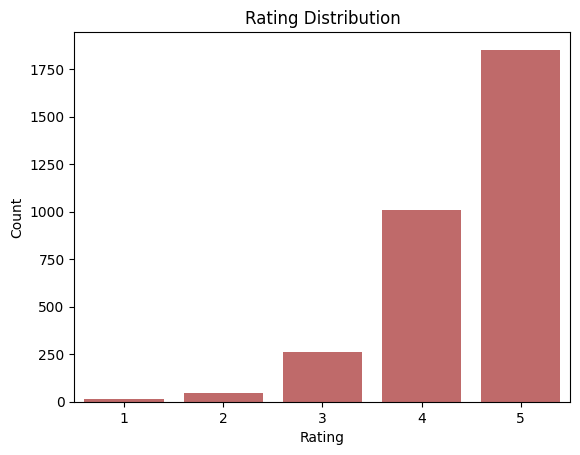

In [31]:
sns.countplot(x='rating', data=data, color='indianred')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Helpful Votes Distribution**

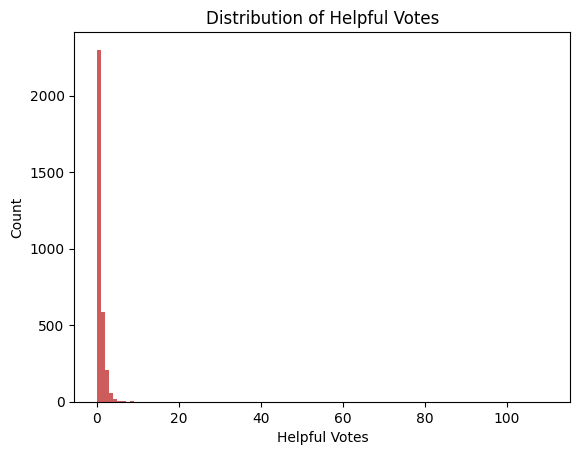

In [32]:
plt.hist(data['helpful_votes'], bins=range(0, data['helpful_votes'].max()), color='indianred')
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Count')
plt.show()

**Reviews over Time**

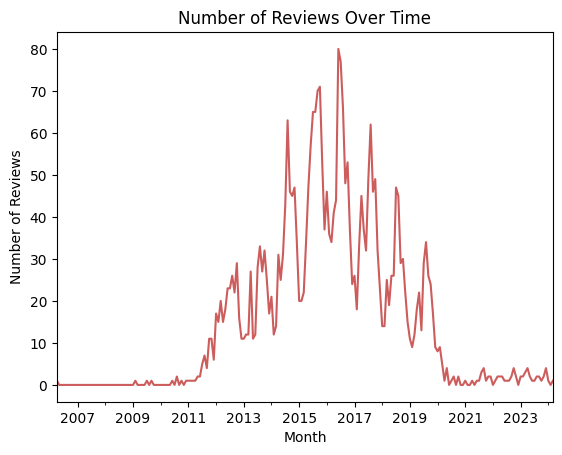

In [33]:
# Group by month
monthly_reviews = data.groupby(pd.Grouper(key='published_date', freq='M')).size()

# Plot the result
monthly_reviews.plot(color='indianred')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

**Reviews by Platform**

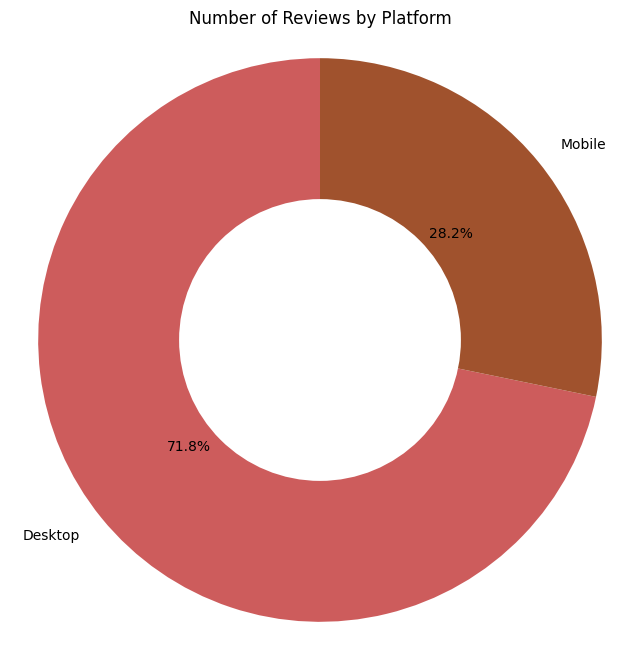

In [34]:
platform_counts = data['published_platform'].value_counts()

# Plot a donut chart
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90, colors=['indianred', 'sienna'])

# Draw a white circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Number of Reviews by Platform')
plt.axis('equal')
plt.show()

**Wordclouds of Title per Published Platform**

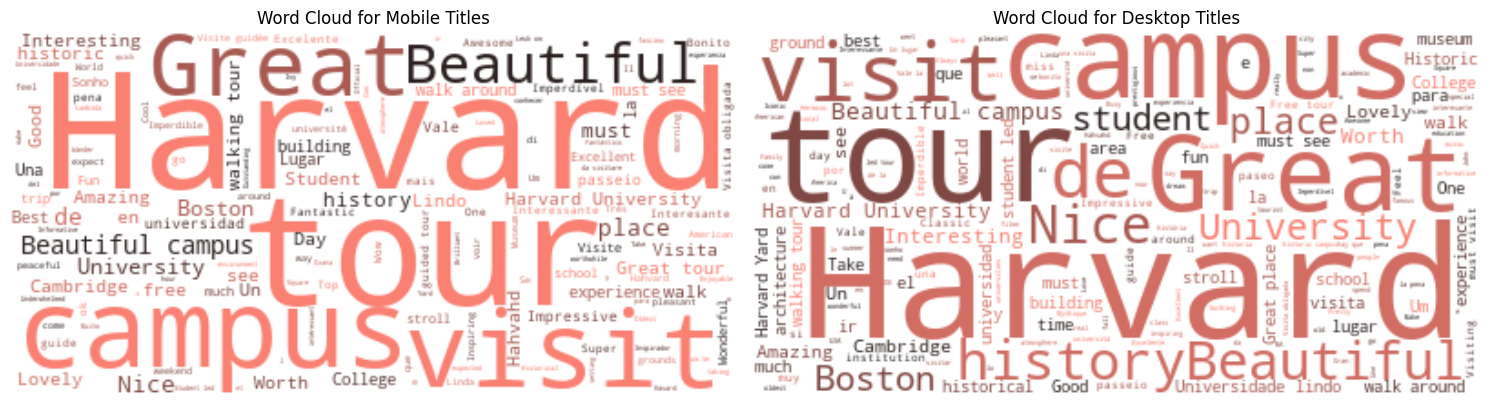

In [35]:
platforms = data['published_platform'].unique()
fig, axes = plt.subplots(1, len(platforms), figsize=(15, 5))

for i, platform in enumerate(platforms):
    # Concatenate titles for the current platform
    text = ' '.join(data[data['published_platform'] == platform]['title'])
    
    # Convert seaborn palette to a matplotlib ListedColormap
    cmap = ListedColormap(palette)
    
    # Generate word cloud with specified seaborn color palette
    wordcloud = WordCloud(width=400, height=200, background_color='white', colormap=cmap).generate(text)
    
    # Plot word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for {platform} Titles')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


**Wordclouds of Review per Language**

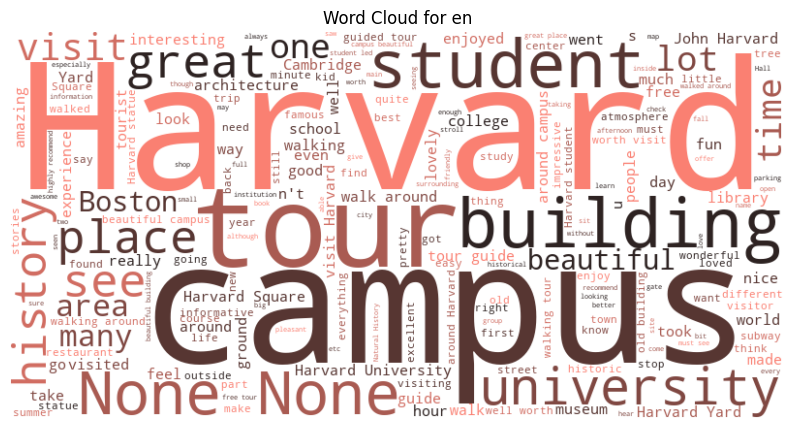

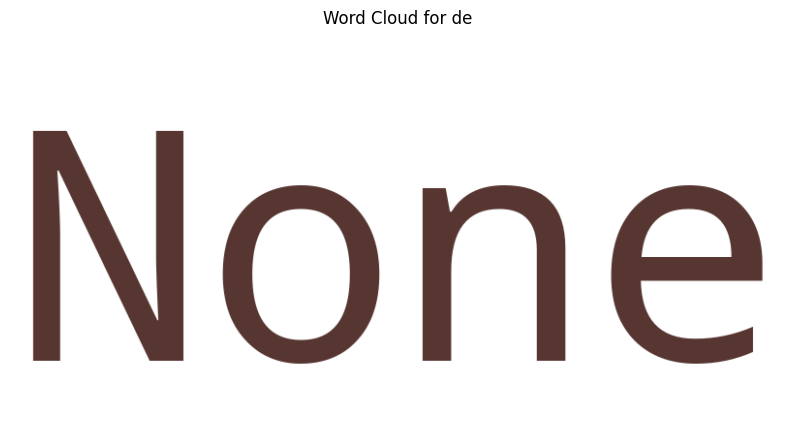

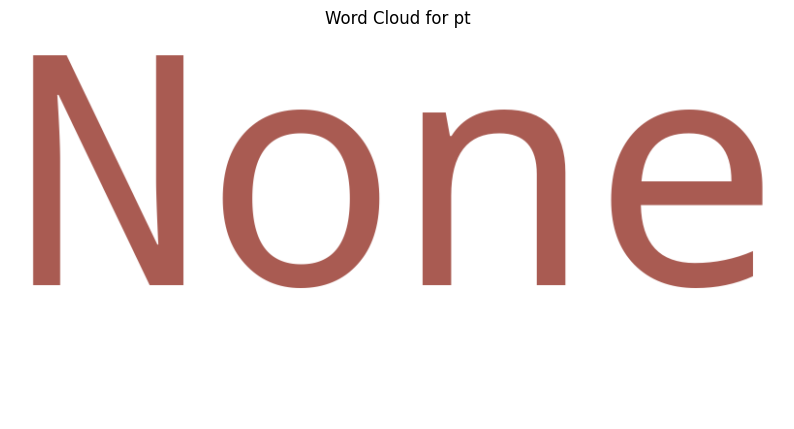

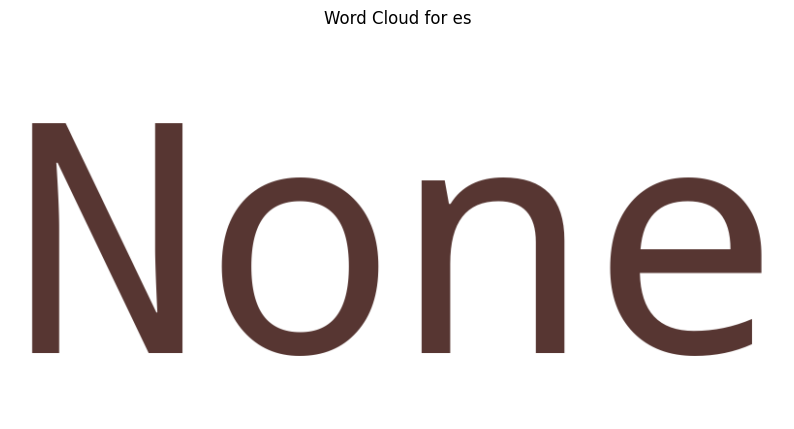

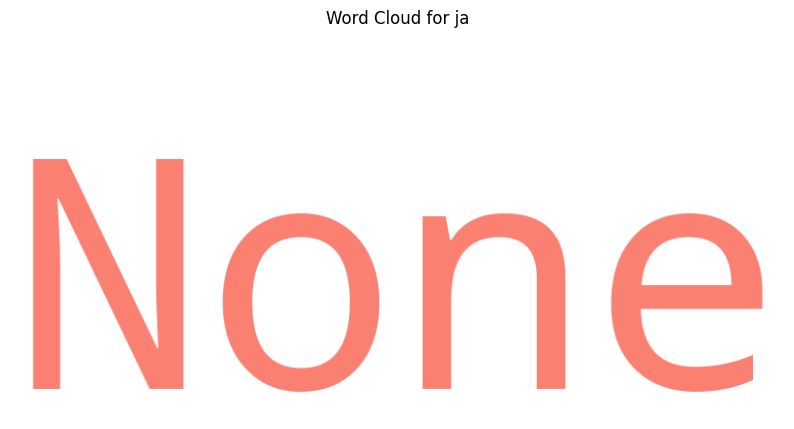

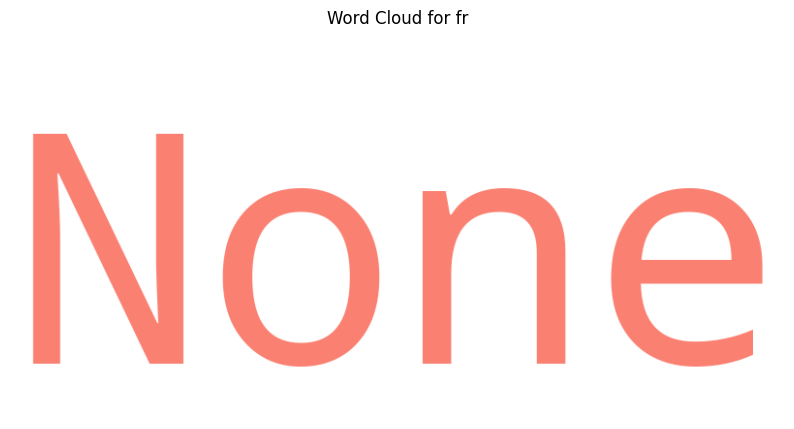

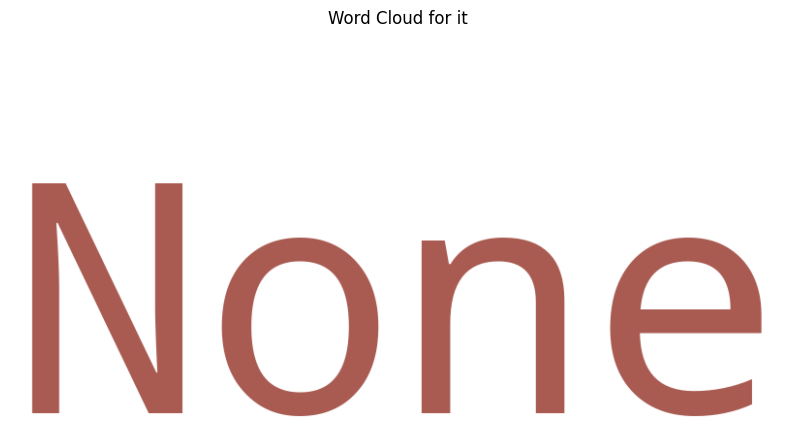

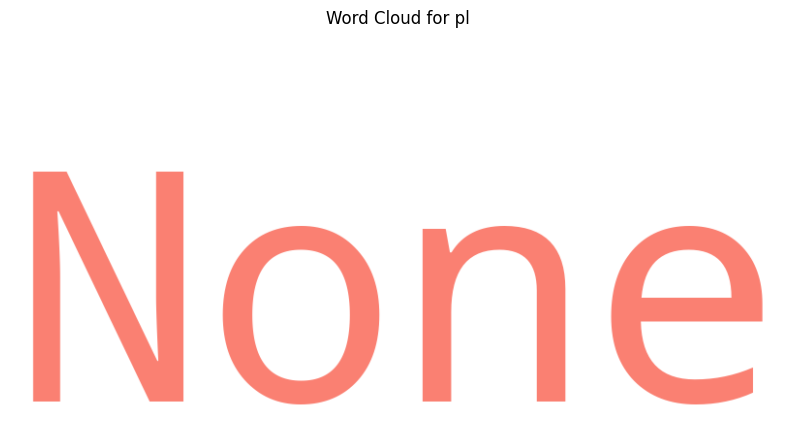

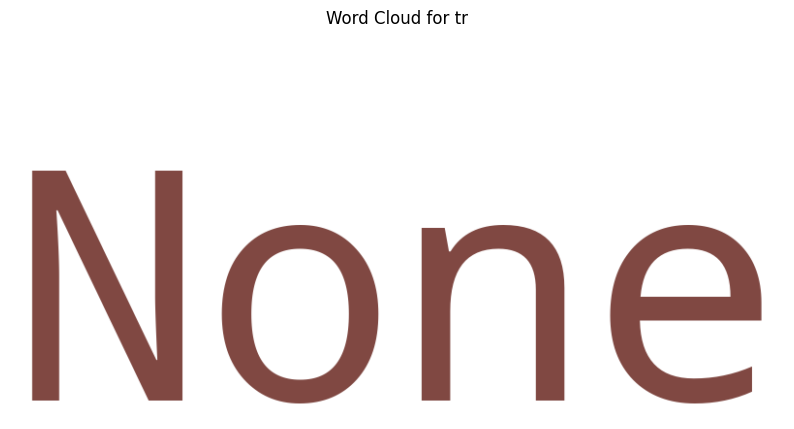

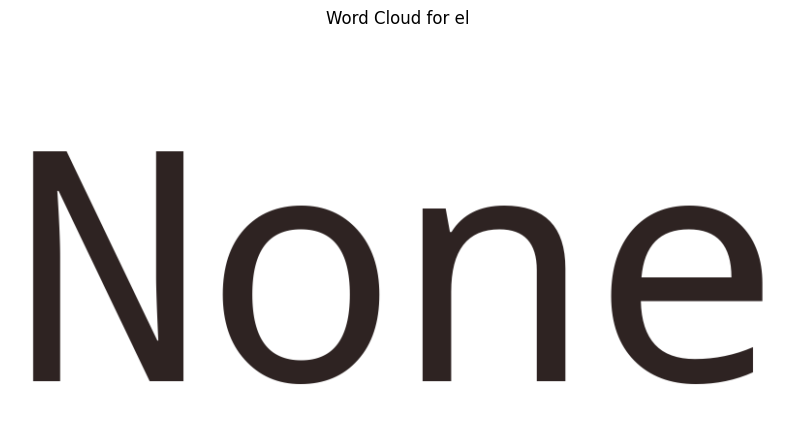

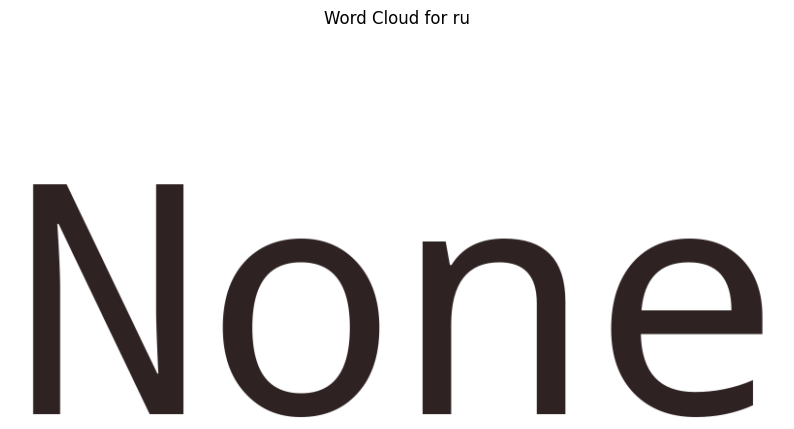

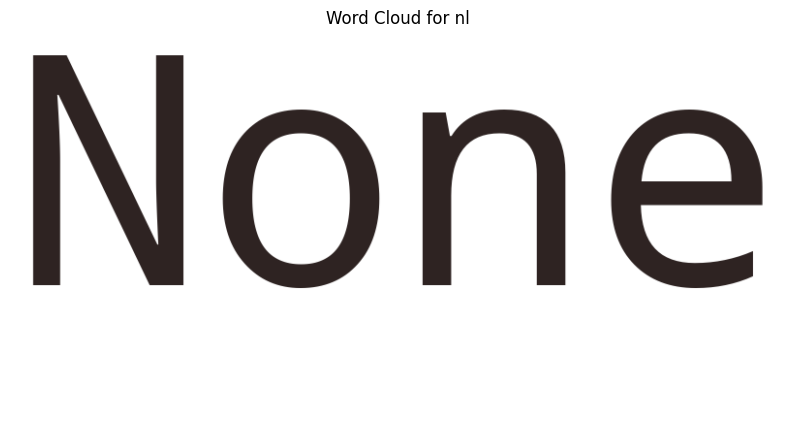

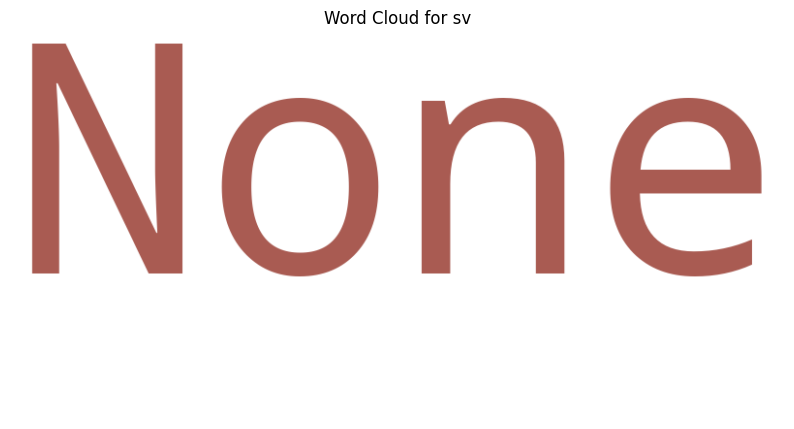

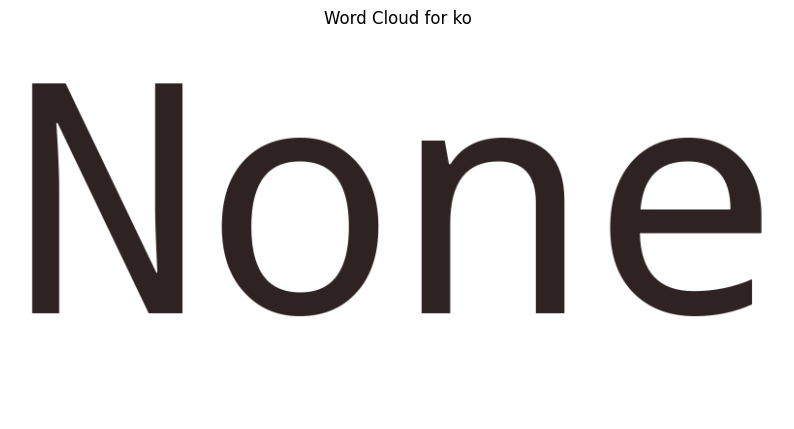

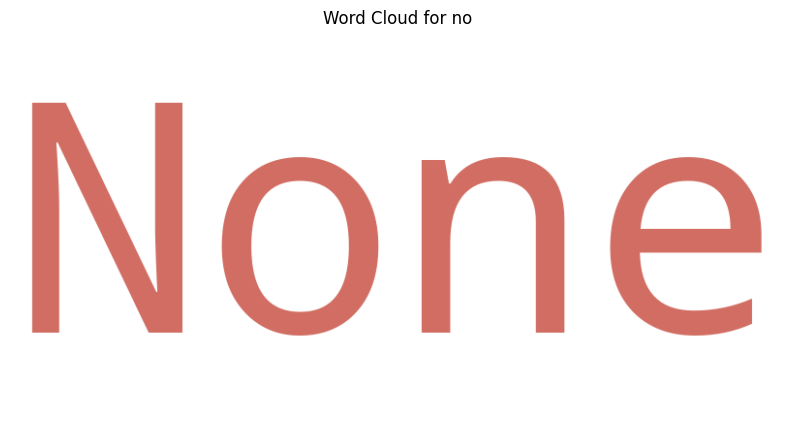

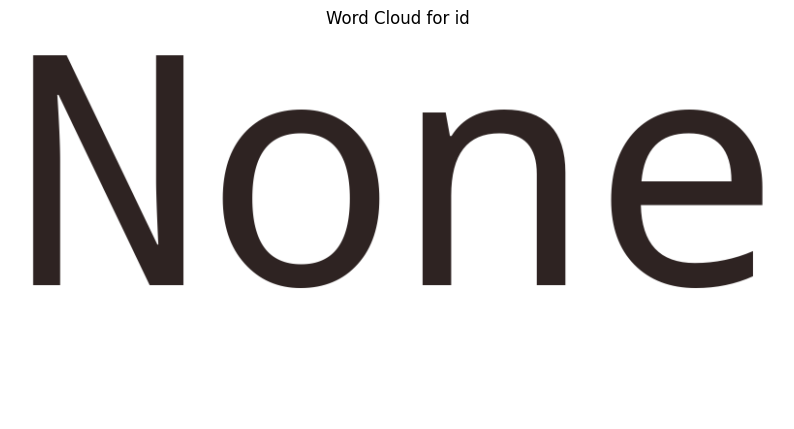

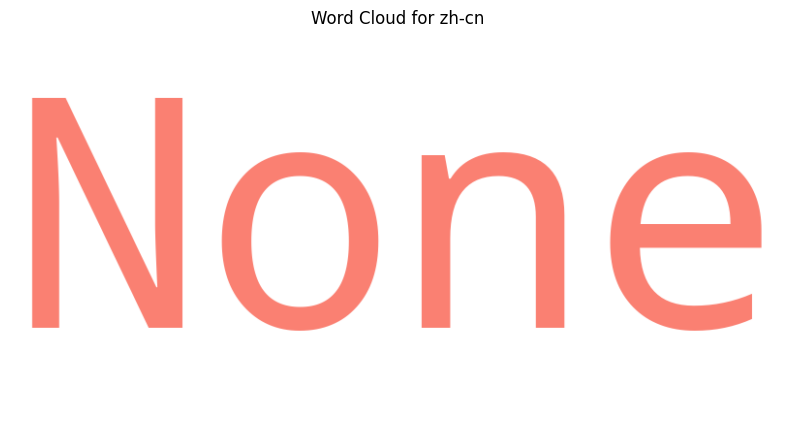

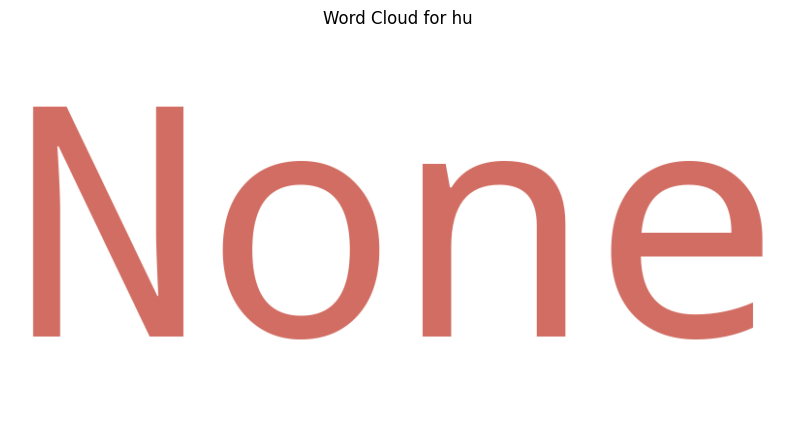

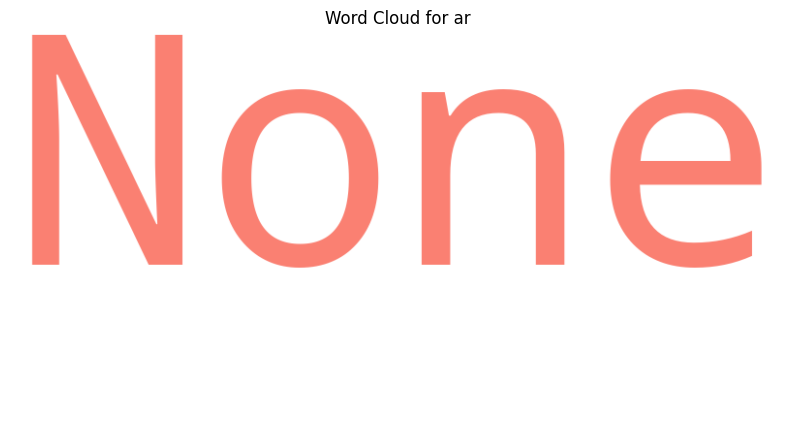

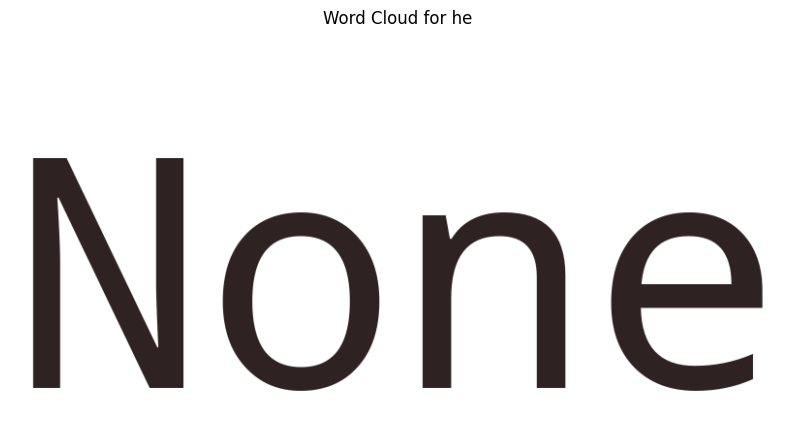

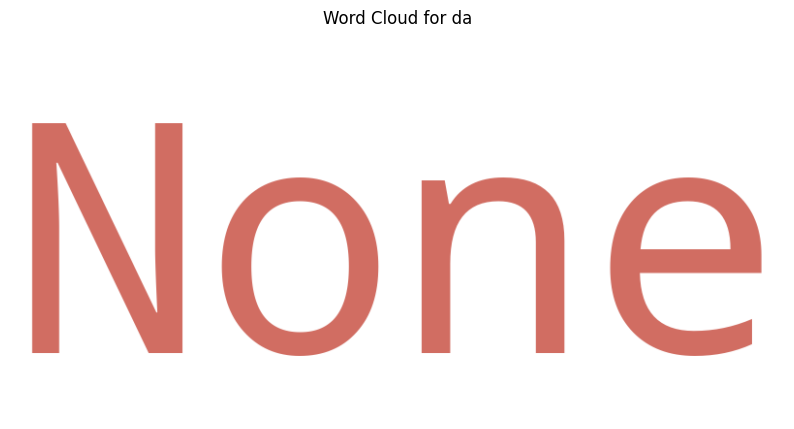

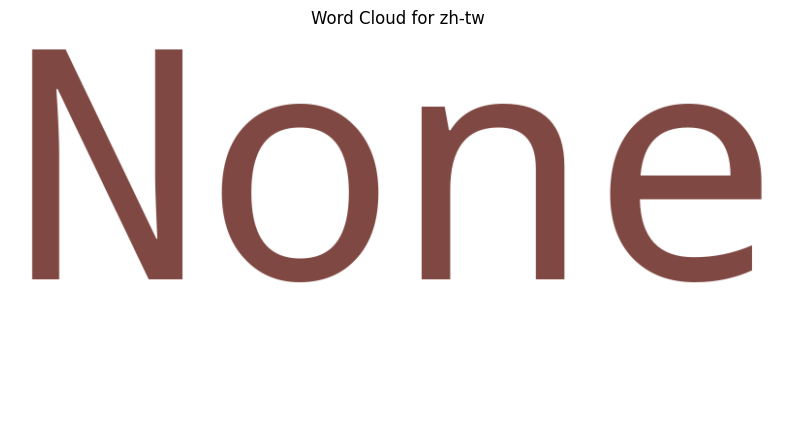

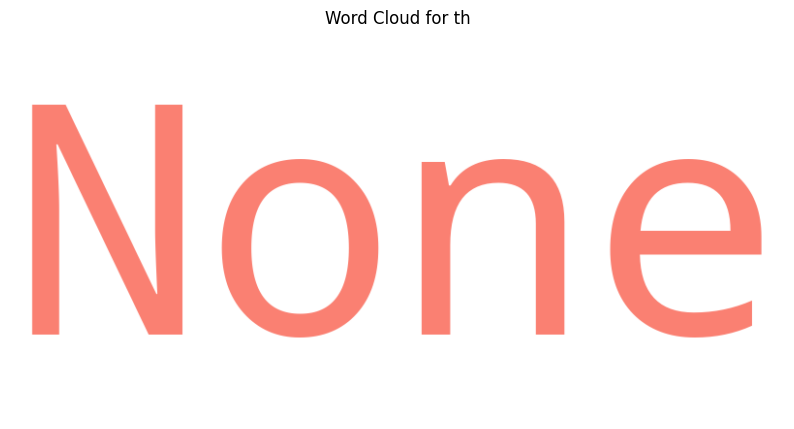

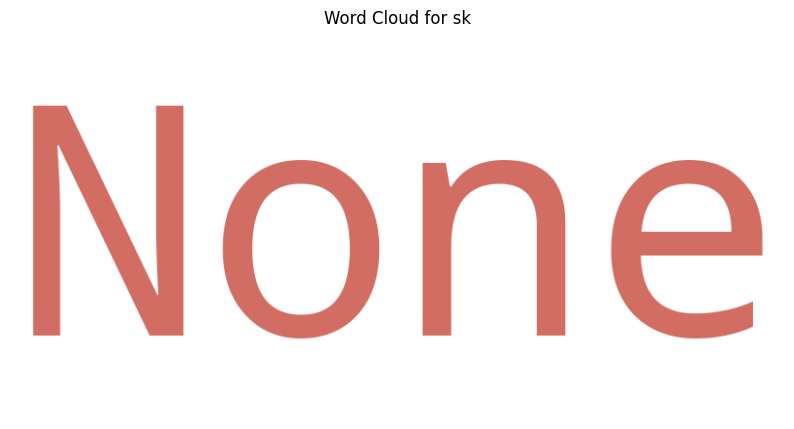

In [37]:
for language in data['language'].unique():
    # Filter text for the current language
    text = ' '.join(data[data['language'] == language]['clean_text'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap).generate(text)
    
    # Plotting the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {language}')
    plt.axis('off')
    plt.show()

## 5. Export

Exporting clean data to be used in the next notebook.

In [ ]:
data_sample.to_csv('clean_sample_data.csv', index=False)

** ** 

## 6. AI Statement

In this project AI was applied to help with the text translation, namely with the function *translate_with_deepl*, available in the *function2* file.